# Serialización y Deserialización de Árboles Generales

La serialización de un árbol implica convertir su estructura y datos en una secuencia o cadena de caracteres que puede ser almacenada o transmitida fácilmente. La deserialización, por otro lado, implica reconstruir el árbol a partir de esta cadena. Estos procesos son fundamentales para la persistencia de datos, transmisión de estructuras de árboles entre sistemas o procesos, y para operaciones como la copia profunda de estructuras de datos.

- **Concepto de Serialización:**
  - Captura la estructura y los datos del árbol en una forma que pueda ser guardada o transmitida.
  - Los métodos de serialización pueden variar dependiendo de si se necesita preservar la información de los nodos nulos o no.

- **Concepto de Deserialización:**
  - Reconstruye el árbol a partir de una representación serializada.
  - Requiere un esquema que permita la interpretación unívoca de la representación para recuperar con exactitud la estructura y los datos del árbol original.

- **Implementación en Python para Árboles Generales:**
  - A menudo se utiliza un marcador especial para representar nodos nulos o finales de ramas en el árbol durante la serialización.
  - La deserialización necesita interpretar correctamente estos marcadores para reconstruir el árbol.

## Implementación en Python

En esta sección, extenderemos la clase `BinaryTree` para agregar métodos de serialización y deserialización. Dado que el árbol que estamos considerando no es un árbol binario de búsqueda específico, asumiremos que la estructura que queremos serializar y deserializar es un árbol binario general.

Vamos a definir dos métodos: `serialize` y `deserialize`. Para simplificar, usaremos el recorrido por niveles (BFS) para la serialización y la deserialización, utilizando un marcador especial ('#') para indicar nodos nulos.

Aquí te muestro cómo implementar este método en la clase [`BinaryTree`](src/BinaryTree.py): 

In [1]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BinaryTree.py
from src.BinaryTree import BinaryTree

In [2]:
import json

class Node:
    # Inicializar un Nodo con llave.
    def __init__(self, key):
        self.left = None
        self.right = None
        self.data = key

# Serializar árbol binario a una cadena JSON.
def serialize(self, root):
    # Árbol vacío se serializa como lista vacía.
    if not root:
        return json.dumps([])

    queue = [root]
    result = []
    while queue:
        node = queue.pop(0)
        # Añadir los datos del nodo al resultado.
        if node:
            result.append(node.data)
            # Añadir hijo izquierdo a la cola.
            queue.append(node.left)
            # Añadir hijo derecho a la cola.
            queue.append(node.right)
        else:
            # Usar '#' para representar un valor nulo.
            result.append('#')
    # Convertir el resultado a una cadena JSON.
    return json.dumps(result)

# Deserializar cadena JSON para reconstruir árbol binario.
def deserialize(self, data):
    nodes = json.loads(data)
    # Retornar None si la lista está vacía.
    if not nodes:
        return None

    root = Node(nodes.pop(0))
    queue = [root]
    while nodes:
        node = queue.pop(0)
        left_val = nodes.pop(0)
        # Crear y añadir hijo izquierdo si no es '#'.
        if left_val != '#':
            node.left = Node(left_val)
            queue.append(node.left)
        # Verificar si aún hay nodos por procesar.
        if nodes:
            right_val = nodes.pop(0)
            # Crear y añadir hijo derecho si no es '#'.
            if right_val != '#':
                node.right = Node(right_val)
                queue.append(node.right)
    # Retornar la raíz del árbol reconstruido.
    return root

# Extender la clase BinaryTree con el nuevo método
BinaryTree.serialize = serialize
BinaryTree.deserialize = deserialize

## Pruebas de Serialización y Deserialización

Vamos a realizar pruebas para verificar que nuestras funciones de serialización y deserialización funcionan correctamente.

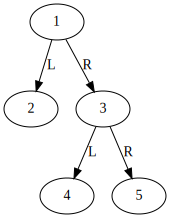

Árbol serializado: [1, 2, 3, "#", "#", 4, 5, "#", "#", "#", "#"]
Árbol deserializado:


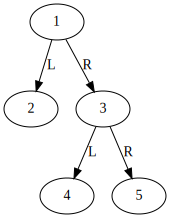

In [3]:
# Creación y visualización del árbol
bt = BinaryTree()
bt.root = bt.deserialize('[1, 2, 3, "#", "#", 4, 5]')

# Visualizar el árbol
dot = visualize_bt(bt)
display(dot)

# Serialización del árbol
serialized_tree = bt.serialize(bt.root)
print("Árbol serializado:", serialized_tree)

# Deserialización y visualización para confirmar
new_bt = BinaryTree()
new_bt.root = new_bt.deserialize(serialized_tree)

print("Árbol deserializado:")

# Visualizar el árbol
dot = visualize_bt(bt)
display(dot)

## Complejidad del Algoritmo

- **Complejidad de tiempo de Serialización/Deserialización**: O(N) donde N es el número de nodos en el árbol. Esto se debe a que cada nodo se visita exactamente una vez.
  
- **Complejidad de espacio de Serialización/Deserialización**: O(N) para almacenar la representación serializada o la cola de nodos durante la deserialización.

## Ejercicios Prácticos

1. Modificar los métodos `serialize` y `deserialize` para manejar árboles binarios con valores nulos en posiciones que no sean hojas.
2. Implementar la serialización y deserialización utilizando el recorrido en orden y postorden.

## Soluciones a los Ejercicios

Para abordar estos ejercicios, primero definiremos los métodos `serialize` y `deserialize` que puedan manejar árboles binarios con valores nulos en posiciones que no sean hojas. Luego, implementaremos la serialización y deserialización utilizando recorridos en orden y postorden.

#### Ejercicio 1: Manejar Valores Nulos en `serialize` y `deserialize`

Para manejar valores nulos, modificaremos los métodos `serialize` y `deserialize` para que incluyan explícitamente estos valores nulos en la serialización, permitiendo una reconstrucción precisa del árbol original.

In [4]:
class TreeNode:
    # Inicializa un nodo de árbol.
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def serialize(root):
    """Codifica un árbol en una cadena de caracteres única."""
    # Ayudante para serializar recursivamente.
    def serialize_helper(node):
        # Retorna "null" si el nodo es None.
        if node is None:
            return ["null"]
        # Concatena el valor del nodo actual y la serialización de sus hijos.
        return [str(node.val)] + serialize_helper(node.left) + serialize_helper(node.right)
    # Une los elementos serializados con comas.
    return ','.join(serialize_helper(root))

def deserialize(data):
    """Decodifica tus datos codificados a árbol."""
    # Ayudante para deserializar recursivamente.
    def deserialize_helper(values):
        # Si el primer valor es "null", no hay nodo que construir.
        if values[0] == "null":
            values.pop(0)
            return None
        # Crea un nuevo TreeNode con el valor actual.
        root = TreeNode(int(values.pop(0)))
        # Construye el subárbol izquierdo y derecho.
        root.left = deserialize_helper(values)
        root.right = deserialize_helper(values)
        return root
    # Divide la cadena codificada en elementos basados ​​en comas.
    values = data.split(',')
    # Inicia la deserialización desde la raíz.
    return deserialize_helper(values)


Este enfoque maneja los valores nulos al incluirlos explícitamente en la serialización y verificarlos durante la deserialización, permitiendo reconstruir correctamente el árbol incluso si tiene valores nulos en posiciones que no son hojas.

### Ejercicio 2: Serialización y Deserialización con Recorridos en Orden y Postorden

Para serializar y deserializar un árbol binario utilizando los recorridos en orden y postorden, necesitamos combinar ambas representaciones. La clave aquí es que el recorrido en postorden nos da el orden de los nodos, mientras que el recorrido en orden nos ayuda a determinar la estructura del árbol.

In [5]:
def serialize_in_post_order(root):
    # Define la función para recorrer el árbol en orden.
    def inorder(node):
        # Retorna el recorrido en orden del subárbol izquierdo + valor del nodo actual si existe.
        if node:
            return inorder(node.left) + [node.val]
        else:
            # Retorna "null" si el nodo es None.
            return ["null"]
        # Agrega el recorrido en orden del subárbol derecho si existe.
        + inorder(node.right) if node else ["null"]

    # Define la función para recorrer el árbol en postorden.
    def postorder(node):
        # Retorna el recorrido en postorden de los subárboles izquierdo y derecho + valor del nodo actual si existe.
        if node:
            return postorder(node.left) + postorder(node.right) + [node.val]
        else:
            # Retorna "null" si el nodo es None.
            return ["null"]

    # Realiza los recorridos en orden y postorden y une los resultados separados por comas.
    return ','.join(inorder(root) + postorder(root))

# Función para deserializar datos en postorden.
def deserialize_in_post_order(data):
    # Construye el árbol utilizando las listas de inorden y postorden.
    def build_tree(inorder, postorder):
        # Si alguna de las listas está vacía, retorna None.
        if not inorder or not postorder:
            return None
        # El último elemento de postorden es la raíz.
        root_val = postorder.pop()
        # Crea un nuevo nodo del árbol con el valor de la raíz.
        root = TreeNode(root_val)
        # Encuentra el índice del valor de la raíz en la lista de inorden.
        index = inorder.index(root_val)

        # Construye recursivamente el subárbol derecho e izquierdo.
        root.right = build_tree(inorder[index+1:], postorder)
        root.left = build_tree(inorder[:index], postorder)

        # Retorna el nodo raíz construido.
        return root

    # Separa los valores de inorden y postorden.
    values = data.split(',')
    mid = len(values) // 2
    # Convierte los valores a int o None dependiendo de si son "null" o no.
    inorder = [None if val == "null" else int(val) for val in values[:mid]]
    postorder = [None if val == "null" else int(val) for val in values[mid:]]

    # Inicia la construcción del árbol y lo retorna.
    return build_tree(inorder, postorder)


La función `serialize_in_post_order` genera dos listas: una para el recorrido en orden y otra para el recorrido en postorden, incluyendo `"null"` para nodos nulos. La función `deserialize_in_post_order` utiliza estas listas para reconstruir el árbol. Este proceso se basa en encontrar la raíz del árbol en el recorrido en postorden (el último elemento) y utilizar el recorrido en orden para separar los subárboles izquierdo y derecho.

Estas soluciones asumen un entendimiento básico de cómo operan los recorridos en orden y postorden en un árbol binario y cómo estas representaciones pueden utilizarse conjuntamente para reconstruir el árbol original. La serialización y deserialización basadas en estos recorridos son más complejas que las basadas en un recorrido en preorden, pero permiten una reconstrucción única del árbol sin necesidad de almacenar explícitamente los valores nulos, siempre y cuando el árbol no contenga duplicados.